Krista Miller \
Data Science Tools Assignment 3

#### Question 1:

For a presidential election, campaign organizers for both the Republican and Democrat parties are interested in identifying undecided voters who would consider voting for their party.  The file BlueOrRed.csv contains data on a sample of voters with tracked variables including: whether or not they are undecided regarding their candidate preference, age, whether they own a home, gender, marital status, household size, income, years of education, and wheter they attend church.  For this dataset, you would use the *Undecided* variable as your output variable and the rest of the variables as your input variables.  You want to predict whether a candidate is undecided (Undecided = 1) or decided (Undecided = 0).  

a) Upload the data into Python and check for missing data.  If there is any missing data, drop the cases that have the missing data. 

In [4]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [5]:
#load dataset:
voters = pd.read_csv('BlueOrRed.csv')

#check for missing data; dataset is complete so no cases need to be dropped.
counts= voters.isna().sum()
print(counts.sort_values())
#print(voters.head(5))

Age              0
HomeOwner        0
Female           0
Married          0
HouseholdSize    0
Income           0
Education        0
Church           0
Undecided        0
dtype: int64


b) Normalize the continuous variables using min-max normalization.  You should obtain a new dataset that has your normalized coninuous input variables, the categorical input variables (the categorical input variables are fine and don't need to be normalized), and your output variable. 

In [9]:
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data

voters[['Age', 'HouseholdSize', 'Income']] = scaler.fit_transform(voters[['Age', 'HouseholdSize', 'Income']])
print(voters.head(5))


        Age  HomeOwner  Female  Married  HouseholdSize    Income  Education  \
0  0.523810          1       1        1       0.500000  0.306422         15   
1  0.444444          1       1        1       0.833333  0.763303         15   
2  0.587302          1       0        1       0.833333  0.234862         16   
3  0.507937          1       0        1       0.500000  0.025688          8   
4  0.492063          1       1        1       0.166667  0.113761         15   

   Church  Undecided  
0       0          1  
1       1          0  
2       0          1  
3       0          0  
4       1          1  


c) Why do you think using min-max normalization is a better choice for this situation compared to using other scalers such as the Standard Sclaler which standardizes the data?

MinMax normalization is a better choice for this situation because it transforms each value in the column proportionally within the range [0,1].  It preserves the shape of the data set.  StandardScaler, on the other hand, should be used when the data distribution for the features follow a Normal distribution. 

d) Use the train_test_split() function in the sklearn.model_selection module in scikit-learn to split the data into training and test sets.  Your test set should be 30% of the entire data.  Print the shape of the X_train, y_train, X_test, and y_test data.  You can use the default value of the random state in splitting the data, which is random_state = 42.

In [10]:
from sklearn.model_selection import train_test_split

X = voters.drop(['Undecided'], axis= 1)
y = voters['Undecided']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"shape X_train: {X_train.shape}")
print(f"shape y_train: {y_train.shape}")
print(f"shape X_test: {X_test.shape}")
print(f"shape y_test: {y_test.shape}")

shape X_train: (7000, 8)
shape y_train: (7000,)
shape X_test: (3000, 8)
shape y_test: (3000,)


e) Construct a decision tree and fit the tree into the data.  Then use your decision tree model to make predictions on the training set as well as on the test set.  Assign your results to y_train_pred and y_test_pred respectively.  Print out the first 100 predictions for each of the y_train_pred and y_test_pred.

In [11]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)   
clf.fit(X_train,y_train)

y_train_pred = clf.predict(X_train)

y_test_pred = clf.predict(X_test)

print(y_train_pred[0:100])
print(y_test_pred[0:100])

[0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0
 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1]
[0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0]


f) Find the overall accuracy of the tree model on the training set and on the test set.  Use the accuracy_score() function in the sklearn.metrics module.  Does the tree overfit the model?  Why or why not?

In [90]:
from sklearn.metrics import accuracy_score

#predictions on the training set:
acc_train = accuracy_score(y_true = y_train, y_pred = y_train_pred)
print(acc_train)

#predications on the test set:
acc_test = accuracy_score(y_true = y_test, y_pred = y_test_pred)
print(acc_test)

1.0
0.969


The tree is not overfitting the model- the model performs well on both the training set and the test set. In other words, the tree is fit to the training set, but it is still generalizable to the test set.  

g) Also, use the .score() method of the tree estimator to find the overall accuracy on the training set and test set. 

In [91]:
clf.score(X_test, y_test)

0.969

h) Use the zero_one_loss() function inside the sklearn.metric module to compute the overall prediction error of the tree model on the test set and training set. 

In [92]:
from sklearn.metrics import zero_one_loss

#overall prediction error on training set:
zero_one_train = zero_one_loss(y_train, y_train_pred)
zero_one_train = np.around(zero_one_train, 4)
print("Training error: ", zero_one_train)

#overall prediction error on test set:
zero_one_test = zero_one_loss(y_test, y_test_pred)
zero_one_test = np.around(zero_one_test, 4)
print("Test error: ", zero_one_test)

Training error:  0.0
Test error:  0.031


#### Question 2: 

Do other assessments of your model using the following tools in sklearn.metrics module 

a) Generate the classification report using the classification_report()

In [93]:
from sklearn import metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      1814
         1.0       0.96      0.97      0.96      1186

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



b) Generate the confusion matrix using confusion_matrix()

In [94]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred, labels = [0,1])
print(cm)

[[1762   52]
 [  41 1145]]


c) Generate the precision score using precision_score()

In [95]:
precision = metrics.precision_score(y_test, y_test_pred)
precision = np.around(precision, 4)
print("precision: ", precision)

precision:  0.9566


d) Generate the recall score using recall_score()

In [96]:
recall = metrics.recall_score(y_test, y_test_pred)
recall = np.around(recall, 4)
print("recall: ", recall)

recall:  0.9654


e) Generate the f1 score using f1_score()

In [97]:
f1_score = metrics.f1_score(y_test, y_test_pred)
f1_score = np.around(f1_score, 4)
print("F1 score: ", f1_score)

F1 score:  0.961


f) When is it more appropriate to use f1 score (or precision score and recall) compared to using the overall accuracy to evaluate your model?

F1 score (or precision and recall) is a more appropriate metric when the classification problem is not balanced.  Overall accuracy is more appropriate for a balanced classification problem (with approximately the same percentage of positives and negatives in the data). 

g) Generate a roc curve using plot_roc_curve()

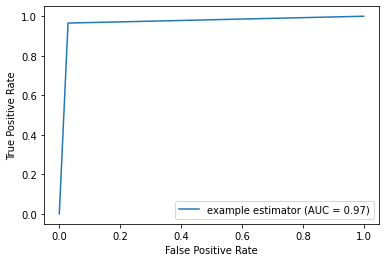

In [98]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()

plt.show()


h) Plot the confusion matrix using plot_confusion_matrix

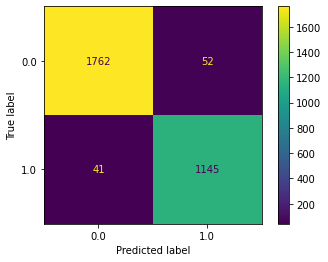

In [99]:
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

plt.show()

#### Question 3: 

You will now use cross validation to find better accuracy scores as well as to tune your hyperparameters.  The hyperparameters of a decision tree are as shown below.  We are more interested in optimizing the depth of the tree (max_depth).

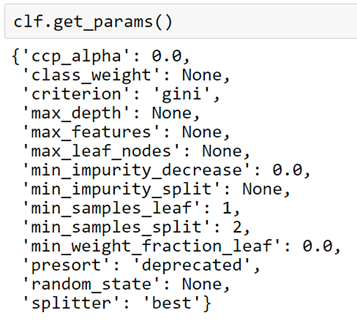

a) First retrieve the maximum depth of this decision tree.  Use clf.tree_.max_depth where clf is the name of your esimator and tree is the module in sklearn.

In [100]:
clf.tree_.max_depth

18

b) You will find the optimal depth of the tree by tuning the max_depth hyperparameter.  Write a for loop to iteratively compute the overall error rate of the model on the test set only for the possible values of the maximum depth of the tree.  Here are ideas for your code
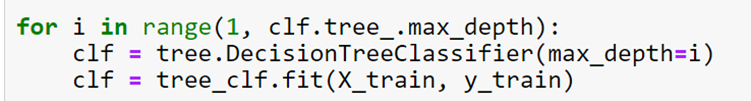
You will need to initialize a variable outside the loop to track the error rates for each maximum depth value.
Then, plot the overall error rate on the y-axis and the maximum depth of the tree on the x-axis.  Also use np.argmin() on the error rates you obtained to retrieve the optimal maximum depth of the tree with the least error rate.  Does this value match with what you see on your plot?

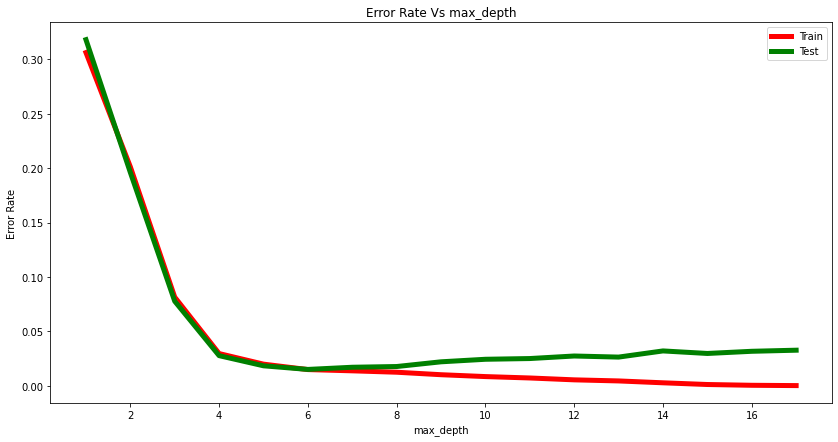

In [101]:

# construct and fit the model   
depth=range(1, 18) 

train_accuracy = []
val_accuracy = []

for i in range(1, 18):
    clf = DecisionTreeClassifier(max_depth = i)
    clf = clf.fit(X_train, y_train)
    train_acc = clf.score(X_train, y_train)
    val_acc = clf.score(X_test, y_test)
    train_accuracy.append(train_acc)
    val_accuracy.append(val_acc)

# # plot the error rates vs the hyperparameter values  
plt.figure(figsize=(14, 7)) 
plt.plot(depth, 1-np.array(train_accuracy), lw=5, c="red"); 
plt.plot(depth, 1-np.array(val_accuracy), lw=5, c="green"); 
plt.legend(["Train", "Test"]); 
plt.title("Error Rate Vs max_depth"); 
plt.xlabel("max_depth"); 
plt.ylabel("Error Rate"); 
plt.show() 
    

In [102]:
val_error = 1-np.array(val_accuracy) 
depth_best = depth[np.argmin(val_error)] 
print("Optimal max_depth value: ", depth_best) 

Optimal max_depth value:  6


Yes, the value obtained from np.argmin(val_error) = 6 matches the graph.  

c) Now, you will still find the optimal maximum depth of the decision tree model using grid search validation.  Additionally, you will be simultaneously optimizing the max_features hyperparameter as well.  You can check the documentation to see what these hyperparameters represent.  You will use the GridSearchCV() constructor inside the sklearn.model_selection module.  Make sure to pass the arguments (estimator and param_grid into the GridSearchCV() constructor.  Set the parameter cv=8.  Do you have the same optimal maximum depth as you got in the question above?  You can use these parameter grid as one of the arguments:

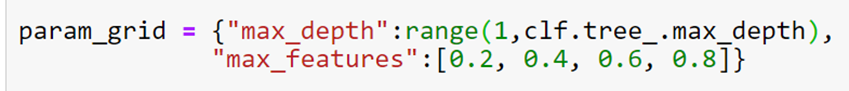

In [103]:
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier()

param_grid = {"max_depth": range(1, 18),
             "max_features": [0.2, 0.4, 0.6, 0.8]}
 
grid = GridSearchCV(estimator=clf, param_grid=param_grid, scoring=None, cv=8) 
grid = grid.fit(X_train, y_train) 
 
print("optimal value of depth: ", grid.best_params_)

print("Accuracy on training set: ", grid.score(X_train, y_train)) 

print("Accuracy on test set: ", grid.score(X_test, y_test)) 

optimal value of depth:  {'max_depth': 8, 'max_features': 0.8}
Accuracy on training set:  0.9877142857142858
Accuracy on test set:  0.981


The optimal max depth using the GridSearch technique results in a max depth of 8, rather than 6.  

d) You will tune the maximum depth hyperparameter again using cross validation but this time, you will use the cross_val_score() function inside the sklearn.model_selection module.  You will use the cross_val_score() function in combination with a for loop to find the optimal maximum depth of the tree.  Here is a code snippet idea:

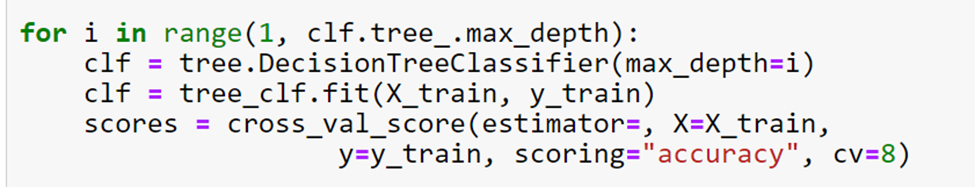

Track the error rate for each depth and plot the error rates versus the corresponding maximum depths of the tree.  Also use the np.argmin() on the error rates to retrieve the optimal maximum depth, corresponding to the lowest error rate.  Does the retrieved optimal maximum depth look like what you see on your plot?

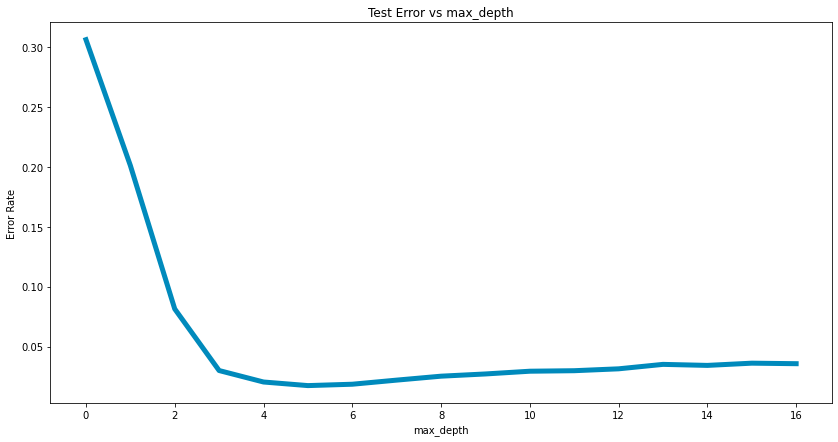

In [104]:
from sklearn.model_selection import cross_val_score

test_errors =[]

for i in range(1, 18):
    clf = DecisionTreeClassifier(max_depth =i)
    clf = clf.fit(X_train, y_train)
    scores = cross_val_score(estimator =clf, X=X_train, y=y_train, scoring = "accuracy", cv=8)
    test_errors.append(1-np.mean(scores))
    
# plotting the error rate vs max_depth: 
plt.figure(figsize=(14, 7)); 
plt.title("Test Error vs max_depth"); 
plt.xlabel("max_depth"); 
plt.ylabel("Error Rate"); 
plt.plot(test_errors, color="#008ABC", lw=5); 
plt.show() 

In [105]:
# compute the optimal depth 
depth = range(1, 18) 
depth_best1 =depth[np.argmin(test_errors)] 
print("Optimal value of max_depth: ", depth_best1) 


Optimal value of max_depth:  6


The graph appears to be minimized at 5 or 6, so it seems to correlate with the optimal value of max_depth. 

e) You will use another approach to plot the error rates versus the maximum depth of the tree.  Here, you would use the validation_curve() function inside the sklearn.model_selection module.  This function implements cross validation and returns the training accuracy scores and test (validation) accuracy scores for each iteration in the k-fold cross validation, for each of the hyperparameter values.  You will need to aggrgate the scores using np.mean(axis=1) to get the average of the accuracy scores for all iterations, for each hyperparameter value.  Use these average accuracy scores to obtain corresponding error rates for the training and test (validation) sets.  Then plot the error rates on the training set versus the maximum depth values.  Also plot on the same figure, the error rates of the test (or validation) set versus the maximum depth values.  What is the optimal maximum depth?

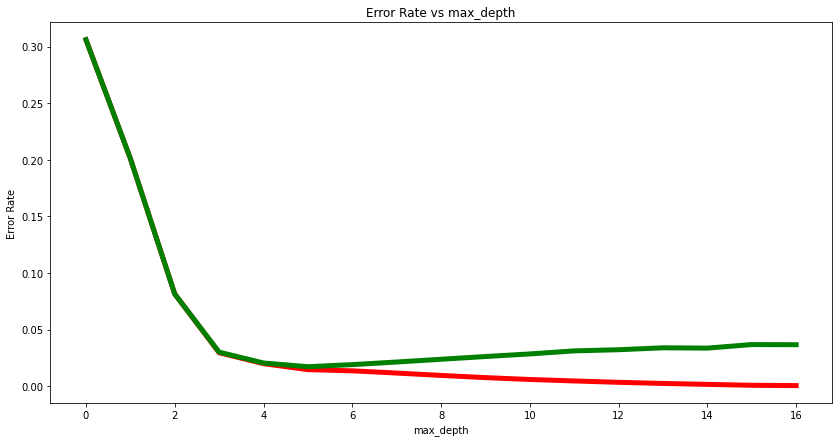

In [68]:
from sklearn.model_selection import validation_curve


clf = DecisionTreeClassifier()

train_acc, test_acc = validation_curve(clf, X_train, y_train,  
                                 param_name="max_depth",  
                                 param_range=range(1, 18), cv=8) 

 
train_acc_average = np.mean(train_acc, axis=1) 
test_acc_average = np.mean(test_acc, axis=1)

plt.figure(figsize=(14, 7)); 
plt.title("Error Rate vs max_depth"); 
plt.xlabel("max_depth"); 
plt.ylabel("Error Rate"); 
plt.plot(1-train_acc_average, color="red", lw=5); 
plt.plot(1-test_acc_average, color="green", lw=5); 
plt.show() 

The optimal max_depth with the validation_curve technique is 5

#### Question 4:

Find your own dataset suitable for classification with at least three input variables and 200 cases.  You will build a decision tree classifier and random forest classifier.  Find some interesting dataset instead of the popular iris data, etc...  Feel free to use a dataset suitable for classification from this link provided below or some other source of your choice:

https://vincentarelbundock.github.io/Rdatasets/articles/data.html 

Address the following and include code/output snippets from b) to f).  Include the response under each sub question. 

a) State your research question, for example: Are decision trees and random forest good models for predicting whether someone will default on a loan or not based on their age and income level?  This is just an example, your dataset does not have to be (or should not be) about loans.

Are decision trees and random forests good models for predicting whether a patient will be diabetic based on # of pregnancies, glucose value, blood pressure, skin thickness, insulin, BMI, diabetes pedigree function, and age?

b) Data pre-processing (to the extent deemed necessary)

In [79]:
from sklearn.preprocessing import MinMaxScaler
diabetes = pd.read_csv('diabetes.csv')

#check for missing data; dataset is complete so no cases need to be dropped.
counts2= diabetes.isna().sum()
#print(counts2.sort_values())
print(diabetes.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


c) Data splitting

In [80]:
from sklearn.model_selection import train_test_split

X = diabetes.drop(['Outcome'], axis= 1)
y = diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


d) Model construction (a decision tree and a random forest)

Note: 

to construct a decision tree, you could use:
from sklearn import tree \
clf = tree.DecisionTreeClassifier() \
clf = clf.fit(X, Y)

To construct a random forest, you could use:
from sklearn.ensemble import RandomForestClassifier \
clf_rf = RandomForestClassifier(max_depth=2, random_state=0) \
clf_rf.fit(X, y)


In [81]:
from sklearn.tree import DecisionTreeClassifier

clf_d = DecisionTreeClassifier(random_state=42)   
clf_d.fit(X_train,y_train)

y_train_pred = clf_d.predict(X_train)
y_test_pred = clf_d.predict(X_test)


print("max depth", clf_d.tree_.max_depth)

print("accuracy prior to hyperparameter tuning:", clf_d.score(X_test, y_test))

max depth 14
accuracy prior to hyperparameter tuning: 0.7012987012987013


In [82]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(max_depth=2, random_state=42)
clf_rf.fit(X,y)

print("max depth", clf_rf.max_depth)

print("accuracy prior to hyperparameter tuning:", clf_rf.score(X_test, y_test))

max depth 2
accuracy prior to hyperparameter tuning: 0.7489177489177489


e) Hyperparameter tuning (for each model, tune the hyperparameter that is important to you and use any of the methods for hyperparameter tuning learning in class such as cross validation with for loop, gridsearch cross validation, etc. You could tune more than a single parameter for each model if you want.)

In [83]:
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier()

param_grid = {"max_depth": range(1, 14),
             "max_features": [0.2, 0.4, 0.6, 0.8]}
 
grid = GridSearchCV(estimator=clf, param_grid=param_grid, scoring=None, cv=8) 
grid = grid.fit(X_train, y_train) 
 
print("optimal value of depth: ", grid.best_params_)

print("Accuracy on training set: ", grid.score(X_train, y_train)) 

print("Accuracy on test set: ", grid.score(X_test, y_test)) 

optimal value of depth:  {'max_depth': 6, 'max_features': 0.6}
Accuracy on training set:  0.8621973929236499
Accuracy on test set:  0.683982683982684


In [84]:
from sklearn.model_selection import GridSearchCV

clf_rf = RandomForestClassifier(max_depth=2, random_state=42)

param_grid = {"max_depth": range(1, 14),
             "max_features": [0.2, 0.4, 0.6, 0.8]}
 
grid = GridSearchCV(estimator=clf_rf, param_grid=param_grid, scoring=None, cv=8) 
grid = grid.fit(X_train, y_train) 
 
print("optimal value of depth: ", grid.best_params_)

print("Accuracy on training set: ", grid.score(X_train, y_train)) 

print("Accuracy on test set: ", grid.score(X_test, y_test)) 

optimal value of depth:  {'max_depth': 7, 'max_features': 0.2}
Accuracy on training set:  0.9273743016759777
Accuracy on test set:  0.7575757575757576


f) Use the best or optimal parameter values to build a model, then compute the accuracy score for the decision tree and for the random forest. 

In [85]:
from sklearn.metrics import accuracy_score

clf_d_best = DecisionTreeClassifier(random_state=42, max_depth = 5)   
clf_d_best.fit(X_train,y_train)

y_train_pred = clf_d_best.predict(X_train)
y_test_pred = clf_d_best.predict(X_test)

print("decision tree accuracy after hyperparameter tuning:", clf_d_best.score(X_test, y_test))

####build the best random forest after hyperparameter tuning:

clf_rf_best = RandomForestClassifier(max_depth=7, random_state=42)
clf_rf_best.fit(X,y)


print("random forest accuracy after hyperparameter tuning:", clf_rf_best.score(X_test, y_test))


decision tree accuracy after hyperparameter tuning: 0.7489177489177489
random forest accuracy after hyperparameter tuning: 0.9047619047619048


g) Discuss about overfitting for both models and, also discuss which model is better for classification for your dataset and why?

The model that better for classifying this data is a random forest.  After tuning for max_depth, the accuracy moved from 0.75 to 0.90.  A random forest model is preferrable over a decision tree for a data set like this- training on random selections of instances and variables allows for multiple tree structures to be created, and aggregated into one result.  The ability of a random forest to limit overfitting without significantly increasing error due to bias makes it a more powerful model to a single decision tree. 